# 1. EigenLBA

## (a) Network

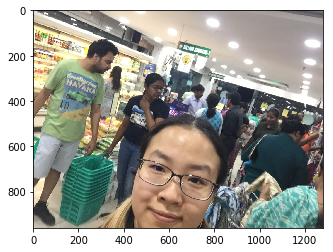

In [374]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('grocery.png')

plt.imshow(img)

## (b) Modelling: Estimation Process and Assumptions

My network is a major neighbourhood grocery store.

I went during a relatively not busy time (around 8pm) to make counting easier, as it is way too busy during peak hours. I counted the number of people moving between each node over a 15 minute period, and then calculated the number of people who stayed at each node by deducting the number of people who moved away from the number of people who moved to the node.

My assumption is that people staying at the node is number of people entering - number of people leaving. 

## (c) Modelling: Matrix

In [370]:
M = matrix(QQ,[[-3, 6, 5, 3, 3],
                  [3, 1, 4, 6, 3],
                  [3, 3, 1, 3, 7],
                  [6, 3, 3, 0, 5],
                  [8, 3, 3, 5, 1]])

_________

## (d) Changing to Probabilities

In [371]:
M = matrix(QQ,[[-3, 6, 5, 3, 3],
                  [3, 1, 4, 6, 3],
                  [3, 3, 1, 3, 7],
                  [6, 3, 3, 0, 5],
                  [8, 3, 3, 5, 1]])

M = M.transpose()

for i in range(len(M[0])):
    M[i] = M[i]/sum(M[i])

M = M.transpose()
M

[-3/17   3/8  5/16  3/17  3/19]
[ 3/17  1/16   1/4  6/17  3/19]
[ 3/17  3/16  1/16  3/17  7/19]
[ 6/17  3/16  3/16     0  5/19]
[ 8/17  3/16  3/16  5/17  1/19]

_________

## (e) Eigens

In [252]:
D,S = M.eigenmatrix_right()

In [320]:
print('eigenvalues')
D

eigenvalues


[                                           1                                            0                                            0                                            0                                            0]
[                                           0                         -0.2637258044744608?                                            0                                            0                                            0]
[                                           0                                            0                         -0.1810018769566180?                                            0                                            0]
[                                           0                                            0                                            0 -0.2770556639284235? - 0.1640735676119522?*I                                            0]
[                                           0                                            0  

In [322]:
print('eigenvectors')
S

eigenvectors


[                                           1                                            1                                            1                                            1                                            1]
[                               346064/307071                          -1.823193551205371?                          -4.418069402168773?  0.2537632114565907? - 0.1669774912373533?*I  0.2537632114565907? + 0.1669774912373533?*I]
[                               115720/102357                           3.010319879727358?                           7.394042796731479?  0.0753259062706636? - 0.8691116032655037?*I  0.0753259062706636? + 0.8691116032655037?*I]
[                                 13435/12042                         0.05669398985682224?                          -1.647750265280112? -0.5076186827775782? + 0.3524658204049876?*I -0.5076186827775782? - 0.3524658204049876?*I]
[                               132031/102357                          -2.243820318378809?  

## (f) Long Term Behavior

### Testing eigenvectors and random distributions

In [310]:
e1 = vector(S[0])

e2 = vector(S[1])

e3 = vector(S[2])

e4 = vector(S[3])

e5 = vector(S[4])

start1 = vector([1,0,0,0,0])

start2 = vector([1/5,1/5,1/5,1/5,1/5])

start3 = vector([0,1/4,1/4,1/4,1/4])

In [311]:
# testing eigenvalue 1

print('ev 1 is', e1)

e1_s1 = M*e1
print(N(e1_s1))

e1_s2 = M^2*e1
print(N(e1_s2))

e1_s3 = M^600*e1
print(N(e1_s3))

('ev 1 is', (1, 1, 1, 1, 1))
(0.845394736842105, 0.999806501547988, 0.971362229102167, 0.991099071207430, 1.19233746130031)
(0.892454473947800, 0.992579251993693, 1.01154322354043, 0.981741766131660, 1.12168128438641)
(0.882905242468216, 0.995019783143054, 0.998171054822064, 0.985038360119622, 1.13886555944704)


In [312]:
# testing eigenvalue 2

print('ev 2 is', e2)

e2_s1 = M*e2
print(N(e2_s1))

e2_s2 = M^501*e2
print(N(e2_s2))

e2_s3 = M^600*e2
print(N(e2_s3))

('ev 2 is', (346064/307071, -1.823193551205371?, -4.418069402168773?, 0.2537632114565907? - 0.1669774912373533?*I, 0.2537632114565907? + 0.1669774912373533?*I))
(-2.17837412091057 - 0.00310174906323257*I, -0.889956115880761 - 0.0325683651639420*I, -0.280825206082149 + 0.0320514069867365*I, -0.705698071824720 + 0.0439414450624614*I, -0.551899354003760 - 0.0403227378220234*I)
(-0.813465251706490, -0.916762048081893, -0.919665474051360, -0.907565658252508, -1.04929443660971)
(-0.813465251706490, -0.916762048081893, -0.919665474051360, -0.907565658252508, -1.04929443660971)


In [313]:
# testing eigenvalue 3

print('ev 3 is', e3)

e3_s1 = M*e3
print(N(e3_s1))

e3_s2 = M^501*e3
print(N(e3_s2))

e3_s3 = M^600*e3
print(N(e3_s3))

('ev 3 is', (115720/102357, 3.010319879727358?, 7.394042796731479?, 0.0753259062706636? - 0.8691116032655037?*I, 0.0753259062706636? + 0.8691116032655037?*I))
(3.26518537021085 - 0.0161444879863561*I, 2.27464419959415 - 0.169517123856739*I, 1.26711643871464 + 0.166826375859013*I, 2.36965926835424 + 0.228713579806711*I, 2.50896208100677 - 0.209878343822629*I)
(2.06344973629766, 2.32547413966839, 2.33283901916200, 2.30214642145483, 2.66165804129777)
(2.06344973629766, 2.32547413966839, 2.33283901916200, 2.30214642145483, 2.66165804129777)


In [314]:
# testing eigenvalue 4

print('ev 4 is', e4)

e4_s1 = M*e4
print(N(e4_s1))

e4_s2 = M^501*e4
print(N(e4_s2))

e4_s3 = M^600*e4
print(N(e4_s3))

('ev 4 is', (13435/12042, 0.05669398985682224?, -1.647750265280112?, -0.5076186827775782? + 0.3524658204049876?*I, -0.5076186827775782? - 0.3524658204049876?*I))
(-0.860276231479151 + 0.00654735270102144*I, -0.470819611492108 + 0.0687472033607252*I, -0.172067011582069 - 0.0676559779105549*I, -0.0381380477444256 - 0.0927541632644704*I, 0.0506857200470953 + 0.0851155851132787*I)
(-0.263214391782364, -0.296638319078559, -0.297577785760185, -0.293662626938720, -0.339522058690831)
(-0.263214391782364, -0.296638319078559, -0.297577785760185, -0.293662626938720, -0.339522058690831)


In [315]:
# testing eigenvalue 5

print('ev 5 is', e5)

e5_s1 = M*e5
print(N(e5_s1))

e5_s2 = M^60*e5
print(N(e5_s2))

e5_s3 = M^600*e5
print(N(e5_s3))

('ev 5 is', (132031/102357, -2.243820318378809?, -2.328223129282595?, -0.8214704349496760? + 0.6836232740978693?*I, -0.8214704349496760? - 0.6836232740978693?*I))
(-2.07130420475688 + 0.0126988843485672*I, -0.914300523675621 + 0.133338285659956*I, -0.786212000058945 - 0.131221804935195*I, -0.618173319805235 - 0.179900861604702*I, -0.535087374767360 + 0.165085496531374*I)
(-0.869675335277019, -0.980109893891987, -0.983213945292034, -0.970278037655436, -1.12180021094757)
(-0.869675335277019, -0.980109893891987, -0.983213945292034, -0.970278037655436, -1.12180021094757)


In [316]:
a = M^500*start1
print(N(a))

b = M^501*start1
print(N(b))

c = M^600*start1
print(N(c))

(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)


In [317]:
a2 = M^500*start2
print(N(a2))

b2 = M^501*start2
print(N(b2))

c2 = M^600*start2
print(N(c2))

(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)


In [318]:
a3 = M^500*start3
print(N(a3))

b3 = M^501*start3
print(N(b3))

c3 = M^600*start3
print(N(c3))

(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)
(0.176581048493643, 0.199003956628611, 0.199634210964413, 0.197007672023924, 0.227773111889409)


### Long Term Behavior

Since one of our eigenvalues is 1, we know that a steady state exists. When I start out with any random vector, I always reach the steady state

As we can see, any starting vector containing only real numbers will reach a stable state with a distribution of [9/50, 10/50, 10/50, 10/50, 11/50].

There are other eigenvalues and eigenvectors, but they all include imaginary numbers. If we begin with one of these eigenvectors (that include imaginary numbers) we converge to different steady states.

_________

# 2. QR Factorization

## (a) Orthonormalize

$$A=\begin{bmatrix}
    2 & 3 \\
    0 & -2
\end{bmatrix}$$

$V1=\begin{bmatrix}
    2\\
    0
\end{bmatrix}$

$V2=\begin{bmatrix}
    3\\
    -2
\end{bmatrix}$

**Normalize the first vector**:     


In [119]:
A = matrix(QQ,[[2,3],[0,-2]])
v1 = vector([2,0])
a = v1.norm()
# divide the first first vector by its length
w1 = v1/a
w1

(1, 0)

**Make the second vector orthogonal to the first vector**      

In [120]:
v2 = vector([3,-2])
b = w1.dot_product(v2)

w2 = v2 - (b*w1)
w2

(0, -2)

**Normalize the second vector**      

In [121]:
d = w2.norm()
w2 = w2/d
w2

(0, -1)

In [122]:
print(a,b,d)

(2, 3, 2)


**Putting the new vectors together to form $Q$**      

In [123]:
Q = matrix(QQ,[w1,w2]).transpose()
Q

[ 1  0]
[ 0 -1]

_________

## (b) Find R

**Using Sage**

Since we already know Q and A, and since Q is necessarily an invertible matrix (since the inverse of an orthonormal matrix is simply its transpose as Q^TQ=I: any vector dotted by itself will become its length which is 1 since all vectors are normalized, and any vector dotted with any other vector will become 0 since they're orthogonal), we can easily find R by rearranging the equation:   

$A=QR$    
$Q^TA=R$

In [55]:
R1 = Q.inverse()*A
R1

[2 3]
[0 2]

$R = \begin{bmatrix}
    2 & 3 \\
    0 & 2
\end{bmatrix}$

**Using Dot Products**

However, analyzing $R$ deeper shows us its relationship with the Gram-Schmidt process.


If we abstract the values and just look at the equations:

$A = QR$       

Let original vectors be denoted by $v$ and orthonormalized vectors be denoted by $w$

$\begin{bmatrix}
    v1 & v2
\end{bmatrix} = \begin{bmatrix}
    w1 & w2
\end{bmatrix}\begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}$    

Expanding this out we get:     
$\begin{bmatrix}
    v1 & v2
\end{bmatrix} = \begin{bmatrix}
    aw1+cw2 & bw1+dw2
\end{bmatrix}$     

In other words,      
$v1=aw1+cw2$     
and     
$v2=bw1+dw2$       


Essentially, this is saying that the original vectors $v$ can be decomposed into linear combinations of the orthonormalized vectors $w$ which makes a lot of that is how the $w$s are derived.      

To get the compositions, we need to get the dot products of each $v$ onto the $w$ components.

**Understanding $a$**      
$a = v1 \bullet w1$.     
Additionally since we know that $w1$ is just a normalized version of $v1$, $a$ is equal to the length of $w1$.


**Understanding $c$**      
$c = v1 \bullet w2$.       
Additionally since the way Gram Schmidt algorithm works is by basing the orthonormal basis on the first vector considered (it only scales the first vector then makes all other vectors orthogonal), we know that $w2$ should be orthogonal to $v1$. Thus, $c=0$.

**Understanding $b$**      
$b = v2 \bullet w1$.

**Understanding $d$**      
$b = v2 \bullet w2$.

**Why $R$ is Upper Triangular**      
This explains why $R$ is always an upper triangular matrix. Because the way Gram Schmidt works is that it makes each vector orthogonal to the vectors that have come before it, the components of all $w_{>n}$s in $v_n$ will always be 0.

**Shortcut to Finding R after doing Gram-Schmidt**    
Since we already calculated all these dot products when doing the Gram-Schmidt process, we can use them again to fill our R

In [56]:
R2 = matrix(QQ,[[a,b],[0,d]])
R2 == R1

True

_________

## (c) Repeat with 3d Matrix

### Finding Q

**Normalize v1**

In [84]:
At = matrix(QQ,[[1,1,0],[1,0,1],[0,1,1]])
vt1 = vector([1,1,0])
vt2 = vector([1,0,1])
vt3 = vector([0,1,1])

a = vt1.norm()
# divide the first first vector by its length
wt1 = vt1/a
wt1

(1/2*sqrt(2), 1/2*sqrt(2), 0)

**Orthogonalize v2**

In [85]:
b = wt1.dot_product(vt2)

wt2 = vt2 - (b*wt1)
wt2

(1/2, -1/2, 1)

**Normalize v2**

In [86]:
e = wt2.norm()

wt2 = wt2/e
wt2

(1/3*sqrt(3/2), -1/3*sqrt(3/2), 2/3*sqrt(3/2))

**Orthogonalize v3**

In [87]:
c = wt1.dot_product(vt3)
f = wt2.dot_product(vt3)

wt3 = vt3 - (c*wt1) - (f*wt2)
wt3

(-2/3, 2/3, 2/3)

**Normalize v3**

In [88]:
i = wt3.norm()
wt3 = wt3/i
wt3

(-sqrt(1/3), sqrt(1/3), sqrt(1/3))

**Putting the new vectors together to form $Q$**      

In [89]:
Qt = matrix([wt1,wt2,wt3]).transpose()
Qt

[   1/2*sqrt(2)  1/3*sqrt(3/2)     -sqrt(1/3)]
[   1/2*sqrt(2) -1/3*sqrt(3/2)      sqrt(1/3)]
[             0  2/3*sqrt(3/2)      sqrt(1/3)]

### Finding R

**Using Sage**   

In [90]:
Rt1 = Qt.inverse()*At
Rt1

[      sqrt(2)   1/2*sqrt(2)   1/2*sqrt(2)]
[            0     sqrt(3/2) 1/3*sqrt(3/2)]
[            0             0   2*sqrt(1/3)]

**Using Dot Products**   

In [93]:
Rt2 = matrix([[a,b,c],[0,e,f],[0,0,i]])
Rt2==Rt1

True

_________

## (d) vector b as a linear combination of q1 and q2

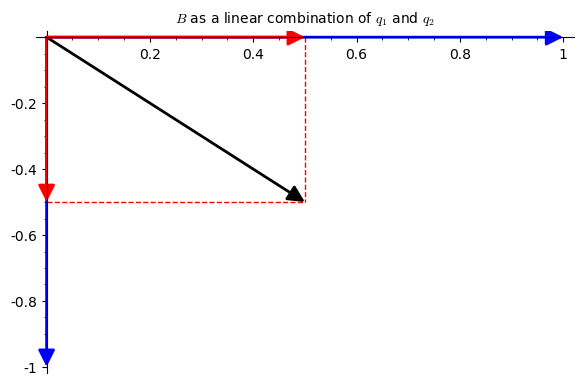

In [355]:
B = vector([0.5,-0.5])
a = plot(w1)
b = plot(w2)
c = plot(B,rgbcolor=(0,0,0))
# plot projection
proj1 = B.dot_product(w1)*w1
proj2 = B.dot_product(w2)*w2
ded1 = B - proj1
ded2 = B - proj2

d = plot(proj1, rgbcolor=(1,0,0),
         title="$B$ as a linear combination of $q_1$ and $q_2$")
e = plot(proj2, rgbcolor=(1,0,0))

f = line([proj1,proj1+ded1], rgbcolor=(1,0,0),linestyle='--')
g = line([proj2,proj2+ded2], rgbcolor=(1,0,0),linestyle='--')

a+b+c+d+e+f+g

$B$ can be written as $a+b$ where $a$ is equal to the dot projection of $B$ on to $q_1$ and $b$ is equal to the dot projection of $B$ on to $q_2$.

Thus, $B = (B \bullet q_1)q_1+(B \bullet q_2)q_2$

_________

## (e) vector c as a linear combination of q1, q2 and q3

In [363]:
C = vector([0.5,0.5,0.5])
at = plot(wt1)
bt = plot(wt2)
ct = plot(wt3)
dt = plot(C,rgbcolor=(0,0,0))

# plot projection
projt1 = C.dot_product(wt1)*wt1
projt2 = C.dot_product(wt2)*wt2
projt3 = C.dot_product(wt3)*wt3

dedt1 = C - projt1
dedt2 = C - projt2
dedt3 = C - projt3

et = plot(projt1, rgbcolor=(1,0,0),
         title="$C$ as a linear combination of $q_1$, $q_2$ and $q_3$")
ft = plot(projt2, rgbcolor=(1,0,0))
gt = plot(projt3, rgbcolor=(1,0,0))


ht = line([projt1,projt1+dedt1], rgbcolor=(1,0,0),linestyle='--')
it = line([projt2,projt2+dedt2], rgbcolor=(1,0,0),linestyle='--')
jt = line([projt3,projt3+dedt3], rgbcolor=(1,0,0),linestyle='--')

at+bt+ct+dt+et+ft+gt+ht+it+jt

Graphics3d Object

Similarly, $C$ can be written as $a+b+c$ where $a$ is equal to the dot projection of $C$ on to $q_1$, $b$ is equal to the dot projection of $C$ on to $q_2$, and $c$ is equal to the dot projection of $C$ on to $q_3$.

Thus, $C = (C \bullet q_1)q_1+(C \bullet q_2)q_2+(C \bullet q_3)q_3$

_________

## (f) How is R related to the steps performed to find Q?

Since the columns of $R$ tell us the coefficients of the linear combinations of the orthonormalized vector $q$s to get the original vector $v$s, and to find $Q$ we reduce all the vectors to their orthogonal components and then nromalize them to length one, they coefficients in R denote the deductions we make from the original matrix $A$ to find $Q$. 


$R$ denotes the components of $q$s in the original vector $v$s, and to find $Q$ we have to deduct all of the components $q_{i}$ for $i<n$ from vector $v_n$ and then divide it by the number of length-one components of itself to normalize it.

## (g) What the entries of R must be in general?

Since R denotes the components of $q_i$ that can be found in $v_i$, and we know that $q_i$ are orthonormalized versions of $v_1$, the entries of R are generally:
$$Entry_{ij} = v_i \bullet u_j$$

Thus the diagonals of R are simply the lengths of the vector of that column/ row number.

This explains why all numbers below the diagonal are $0$. Since gram-schmidt works by making each vector orthogonal from all the vectors before it in sequential order, the orthonormalized vectors will be orthogonal to all vectors that came before it: $u_n \bullet V_i = 0$ for $i < n$.

_________

## (h) Change of Basis Matrix from A to Q? Relation to R?

To change basis, we always transform the vectors by a  matrix that denotes the components of the new basis that give us to old matrix. Thus, the columns of the change of basis matrix must always tell us the coefficients of the linear combination of the old bases vectors that give us the new basis vector.

So for a transformation from A to Q, we need a matrix that tells us the linear combinations of A that give us Q.

This is exactly the $R$ matrix. Hence, $R$ is the change of basis matrix from $A$ to $Q$.

**Proof:**

In [369]:
test = matrix(QQ,[[1,0,2,3],[0,-1,0,-2]])



if test.rref() == matrix(QQ,[[1,0,2,3],[0,1,0,2]]):
    print('omg it worked')

omg it worked


_________